<a id='top'></a>

# CSCI 3022: Intro to Data Science - Spring 2021 Practicum 2
***


**Here are the rules:** 

1. All work, code and analysis, must be your own. 
2. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
3. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be a bit less helpful than we typically are with homework. For example, we will not check answers, significantly debug your code, and so on.  But please don't feel like you're totally alone on this: **feel free to ask questions or ask for help**, and we will decide how best to provide that assistance.
4. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
5. You may **NOT** post to message boards or other online resources asking for help, except Piazza.
6. You may **NOT** copy-paste solutions *from anywhere*.
7. You may **NOT** collaborate with classmates or anyone else.
8. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**NOTES**: 

- You may not use late days on the practicums nor can you drop your practicum grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread.
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. The practicum is designed to be completed using only the packages in the first given code cell.
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Bottom](#bot)

---

In [1]:
##Get them stats in here
import numpy as np 
import pandas as pd 
from scipy import stats
import statsmodels.api as sm
import matplotlib.pylab as plt 
from patsy import dmatrices
import seaborn as sns
import itertools
%matplotlib inline

<br>

---
[Back to top](#top)
<a id='p1'></a>

## [50 points] Problem 1: What makes a good shuffle?

Our goal in this problem is understand something about the statistics of shuffling: what makes a good shuffle?  Can we compare the order of cards in the deck to an original (sorted) order to determine whether or not the deck appears randomized?

In all cases in this problem, we can view a deck as having all unique cards: the standard 52-card playing deck could be represented by integer card identifiers $[0, 1, 2, 3, \dots, 51]$, and a *shuffle* of the deck is a random *permutation* of those 52 indentifiers.

In part 1 of this problem, we explore a sample statistic that reduces the order of the cards into a single measurement.

### Problem 1 Part 1: The Statistic
** Part 1 A: Implementing the statistic.**

The most common *single* statistic used for tracking the randomness of a shuffle is the count of *rising sequences* in that list's indices.  A rising sequence is a sequence of cards that appear in the same order that they did in the original deck, even if some other cards are in between.  For example, if the deck is represented by integers 0-10, card '1' will be part of the same rising sequence as card '0' as long as '1' occurs after '0' in the shuffled deck.  '2' would be part of the same sequence as long as it is after '1'.

A visualization of counting these can be found on page 2 [of this paper](https://statweb.stanford.edu/~cgates/PERSI/papers/bayer92.pdf).  **Look over the images in the paper before proceeding.**



Implement the `rising_seqs` function that takes in a list of integers and returns the number of rising sequences of that list.

Overview of the function:
- Find the indices for the permutation of deck that *would* represent a perfect sort of the deck.   Check `np.argsort` for a quick way to do this.  For example, the deck [3,0,2,1] has sorted permutation of [1,3,2,0], since we find the value 0 in index 1, then the value 1 in index 3, and so forth.
- Count the number of times that the indices in this permutation decrease; e.g. the number of times that index $i$ has a value *more* than index $i+1$.  This represents a location where in the **shuffled** deck, a rising sequence would have been broken or ended, requiring us to start a new sequence.  The total count of rising sequences is 1 plus this value.
- Return the number of rising sequences.
- You may assume the deck's values are all integers and begin at 0, although neither assumption should be necessary.



In [31]:
def rising_seqs(deck):
    #your code here
    #representation of a perfectly sorted deck 
    perfectSort = np.argsort(deck)
    #counter 
    #number of times indices decrease 
    drops = 1
    
    #i -> index 
    #location in the shuffled deck 
    for i in range(0, len(perfectSort) - 1):
        #if the rising sequence breaks or ends
        if(perfectSort[i + 1] < perfectSort[i]): 
            #total count of rising sequences increases by 1 
            drops += 1
    #continues to new seuqnece until all have been counted 
    #returns count of rising sequences 
    return (drops)

In [32]:
def main(): 
    #sanity check 
    #Expected rising sequences: 3
    #Expected drops: 4
        #[0, 1, 2, 3, 4]
        #[1, 2, 4]
        #[0]
    drops = rising_seqs(np.array([0, 1, 2, 3, 4, 1, 2, 4, 0]))
    print("Number of Rising Sequences in given deck: ", drops, "\n")

main()

Number of Rising Sequences in given deck:  4 



** Part 1 B: Trying out the statistic.**

Try out your statistic on a few quick test cases to make sure it's working.

Some examples to sanity check your function.
- [0,1,2,3,4,5,6,7] has only one rising sequence.
- [7,6,5,4,3,2,1,0] has 8 rising sequences: each term is its own.
- [3,1,2,0] has 3 rising sequence: [0], [1,2], [3].
- [0,2,3,5,1,4,7,6] has the 4 rising sequences of [0,1], [2,3,4], [5,6], and [7].



In [33]:
test1=rising_seqs(np.array([0, 1, 2, 3, 4, 5, 6, 7]))
assert test1 == 1, 'Failed check 1'

test2=rising_seqs(np.array([7,6,5,4,3,2,1,0]))
assert test2 == 8, 'Failed check 2'

test3=rising_seqs(np.array([3,1,2,0]))
assert test3 == 3, 'Failed check 3'

test4=rising_seqs(np.array([0,2,3,5,1,4,7,6]))
assert test4 == 4, 'Failed check 4'

** Part 1 C: Bootstrapping.**

What represents a well shuffled deck?  Take a 52-card deck (or the integer list $[0,1,2,\dots ,51]$) and use np.random.shuffle or np.random.permutation to generate 10000 random permutations.  For each, compute and save their counts of rising sequences.

Make a histogram of those rising sequences and print out the mean, 2.5\% percentile and 97.5\% percentile.



In [47]:
def simRS(): 
    rs_hist = []
    for i in range(0, 10000):
        rs_hist.append(rising_seqs(np.random.permutation(52)))
    plt.hist(rs_hist)

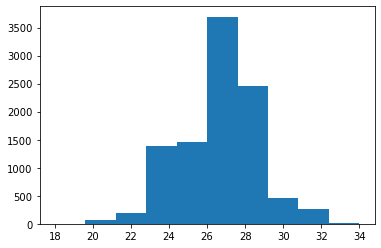

In [48]:
def main(): 
    simRS()
    
main()

** Part 1 D: The Bootstrapped test.**
    
We wish to test the null hypothesis "the deck is well-shuffled" against the alternative "the deck is not well-shuffled," using the *test statistic* of rising sequences.  In plain English, what is the *rejection rejection* of such a test?  When would we decide that a given ordering is not a good shuffle?  Use a 95% significance, as suggested by the interval in part 1C.

If the given ordering has many rising-seqences, we would consider it a better shuffle. If there are less rising-sequences, the desk is closer to being perfectly sorted rather than well shuffled. Ideally, a normal distribution of drops is preferred. A badly shuffled deck would have a more bi-modal distribution compared to the unimodal, normal distribution of a well shuffled deck. 

### Problem 1 Part 2: How to Shuffle

A "perfect riffle" shuffle is a shuffle in which a deck is divided exactly in half, and then a new deck order is formed by alternating one-card-at-a-time from each half.  Depending on whether or not the top or first card of the interleaving came from the top half of the deck or the bottom half of the deck this is called an *out-shuffle* or *in-shuffle*, respectively.

** Part 2 A: The out-shuffle.**

Write a function that performs a perfect out-shuffle of a deck.  This function should take an ordered list of length $n$ and:

- breaks the deck in half, with the "top" of the deck being the first $n/2$ elements and the "bottom" of the deck being the last $n/2$ elements.
- creates a new ordered list generated by interweaving one card from the top pile, *then* one card from the "bottom" pile, etc.  The top/first card comes from the "top" elements and the bottom/last card comes from the "bottom" pile.

You may for convenience assume that there are an even number of cards in the deck.

(Note and sanity check: a perfect out-shuffle on a deck with an even number of cards will always have the first card of the input ordering remain the first card of the output ordering, and the input last card remain the last card)
.
In the suggested API:
 - deck is a numpy array of integers (or floats) from 0 to (n-1) for a deck of length n.  Consider using np.array(range(n)) if you want to initialize a sorted deck.
 - Return statement is a numpy array of the same form

In [49]:
#recommended API for checks:
#deck -> order list of length n 
def out_shuffle(deck):
    #your code here!
    
    #cut/shuffled deck list
    new_deck = []
    
    #length of list 
    #number of cards in deck 
    n = len(deck)
    
    #length of half the deck 
    #number of cards in cut deck 
    cut_deck = n // 2
    
    #pulled cards 
    card1 = 0 
    card2 = 0 
    
    #index of top and bottom of deck 
    firstCard = deck[:cut_deck]
    lastCard = deck[cut_deck:]
    
    #iterate through deck 
    for i in range(0, n):
        #if part of n/2 elements 
        if(i % 2 == 0):
            #append to the top of new deck 
            new_deck.append(firstCard[card2])
            #pull next card 
            card2 = card2 + 1
        #part of other half of deck 
        else:
            #append to bottom of new deck 
            new_deck.append(lastCard[card1])
            #pull next card
            card1 = card1 + 1
    #return newly shuffled and re-ordered deck 
    return new_deck
#sanity check: should be 0-5-1-6...
out_shuffle(np.array(range(10))) 

[0, 5, 1, 6, 2, 7, 3, 8, 4, 9]

** Part 2 B: Counting out-shuffles.**

How much are we supposed to shuffle?  Beginning with a sorted deck $[0,1,2,\dots ,51]$, perform out-shuffles 52 times *in a row*, where the result of one shuffle is used as the input/start for another.  For each resulting state of the deck, do the following:

- save the number of rising sequences in the deck
- Perform a formal hypothesis test using the bootstrapped rejection region in part a): at 95\% confidence would we reject the null hypothesis that "the deck is well-shuffled?."
- Compute a two-tailed p-value for the number of rising sequences in the deck.  In other words, what proportion of the time in the simulated `np.random.shuffle` shuffles did we observe a more extreme number of rising sequences?

Make a plot with "number of perfect out shuffles" on the $x$-axis and "rising sequences" for the shuffle on the $y$-axis.  Include a visual indicator for when the number of rising sequences was *inside* or *outside* of the rejection region in part 1.

Using this plot make a plain English statment answering the following: "What is the best number of shuffles to approximately randomize a sorted deck using out-shuffles?  Does it end up well randomized?"  Explain your answer.


In [117]:
def countOutS(): 
    #perfect deck from 0 to 51 (1 to 52 cards)
    perfectDeck = np.arange(52)
    #set current deck to perfect deck 
    out_deck = perfectDeck
    #create array of zeros
    #rising sequences for each out deck 
    rs_data = []
    #iterator 
    i = 0
    #iterate through 52 out shuffles 
    while(i < 52): 
        #out shuffle current deck and set as new current deck 
        out_deck = out_shuffle(out_deck)
        #count rising sequences in current deck 
        #save rising sequence to list 
        rs_data.append(rising_seqs(out_deck))
        #iterate to next shuffle 
        i += 1  
    #return rising sequences data and final deck 
    return(rs_data, out_deck)
            

The perfeclty sorted deck with 52 out-shuffles performed resulted in the following deck:  [0, 16, 32, 48, 13, 29, 45, 10, 26, 42, 7, 23, 39, 4, 20, 36, 1, 17, 33, 49, 14, 30, 46, 11, 27, 43, 8, 24, 40, 5, 21, 37, 2, 18, 34, 50, 15, 31, 47, 12, 28, 44, 9, 25, 41, 6, 22, 38, 3, 19, 35, 51] 

For each iteration, the recorded rising sequences are as follows:  [ 2  4  8 16 32 13 26  1  2  4  8 16 32 13 26  1  2  4  8 16 32 13 26  1
  2  4  8 16 32 13 26  1  2  4  8 16 32 13 26  1  2  4  8 16 32 13 26  1
  2  4  8 16] 



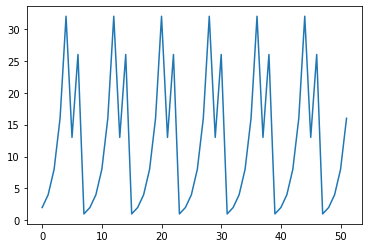

In [123]:
def main(): 
    #initialize lists 
    perfectDeck = range(0, 52)
    #number of rising sequences from 52 out shuffles 
    rising_sequences = []
    #final deck 
    shuffled = []
    #call program 
    (rising_sequences, shuffled) = countOutS()
    
    plt.plot(perfectDeck, rising_sequences)
    
    print("The perfeclty sorted deck with 52 out-shuffles performed resulted in the following deck: ", shuffled, "\n")
    print("For each iteration, the recorded rising sequences are as follows: ", rising_sequences, "\n")
main()

** Part 2 C: In-shuffles.**

Repeat parts 2A and 2B for in shuffles.  This means do the following:

Write a function that performs a perfect in-shuffle of a deck.  This function should take an ordered list of length $n$ and:

- breaks the deck in half, with the "top" of the deck being the first $n/2$ elements and the "bottom" of the deck being the last $n/2$ elements.
- creates a new ordered list generated by interweaving one card from the bottom pile, *then* one card from the "top" pile, etc.  The top/first card comes from the "bottom" elements and the bottom/last card comes from the "top" pile.

After this, repeat the plot and hypothesis tests made in part 2B for the in-shuffle.  Again, answer the prompt:  "What is the best number of shuffles to approximately randomize a sorted deck using in-shuffles?  Does it end up well randomized?"  Explain your answer.




In [119]:
#recommended API for checks:
#deck -> order list of length n 
def in_shuffle(deck):
    #your code here!
    
    #cut/shuffled deck list
    new_deck = []
    
    #length of list 
    #number of cards in deck 
    n = len(deck)
    
    #length of half the deck 
    #number of cards in cut deck 
    cut_deck = n // 2
    
    #pulled cards 
    card1 = 0 
    card2 = 0 
    
    #index of top and bottom of deck 
    firstCard = deck[:cut_deck]
    lastCard = deck[cut_deck:]
    #iterate through deck 
    for i in range(0, n):
        #if part of n/2 elements 
        if(i % 2 == 0):
            #append to the top of new deck 
            new_deck.append(lastCard[card2])
            #pull next card 
            card2 = card2 + 1
        #part of other half of deck 
        else:
            #append to bottom of new deck 
            new_deck.append(firstCard[card1])
            #pull next card
            card1 = card1 + 1
    #return newly shuffled and re-ordered deck 
    return new_deck

#sanity check: should be 5-0-6-1......
in_shuffle(np.array(range(10))) 

[5, 0, 6, 1, 7, 2, 8, 3, 9, 4]

In [124]:
def countInS(): 
    #perfect deck from 0 to 51 (1 to 52 cards)
    perfectDeck = np.arange(52)
    #set current deck to perfect deck 
    in_deck = perfectDeck
    #create array of zeros
    #rising sequences for each out deck 
    rs_data = []
    #iterator 
    i = 0
    #iterate through 52 out shuffles 
    while(i < 52): 
        #out shuffle current deck and set as new current deck 
        in_deck = in_shuffle(in_deck)
        #count rising sequences in current deck 
        #save rising sequence to list 
        rs_data.append(rising_seqs(in_deck))
        #iterate to next shuffle 
        i += 1  
    #return rising sequences data and final deck 
    return(rs_data, in_deck)
            

The perfeclty sorted deck with 52 out-shuffles performed resulted in the following deck:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51] 

For each iteration, the recorded rising sequences are as follows:  [2, 4, 8, 16, 32, 11, 22, 44, 35, 17, 34, 15, 30, 7, 14, 28, 3, 6, 12, 24, 48, 43, 33, 13, 26, 52, 51, 49, 45, 37, 21, 42, 31, 9, 18, 36, 19, 38, 23, 46, 39, 25, 50, 47, 41, 29, 5, 10, 20, 40, 27, 1] 



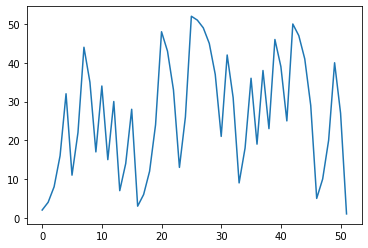

In [125]:
def main(): 
    #initialize lists 
    perfectDeck = range(0, 52)
    #number of rising sequences from 52 out shuffles 
    rising_sequences = []
    #final deck 
    shuffled = []
    #call program 
    (rising_sequences, shuffled) = countInS()
    
    plt.plot(perfectDeck, rising_sequences)
    
    print("The perfeclty sorted deck with 52 out-shuffles performed resulted in the following deck: ", shuffled, "\n")
    print("For each iteration, the recorded rising sequences are as follows: ", rising_sequences, "\n")
main()

### Problem 1 Part 3: Noisy Shuffling; Extra Credit
** Part 3 A: Random shuffles; Extra Credit**

**This part of the problem is for extra credit only.  It is not required.** 

One result of your analysis above should have been that "perfect" shuffles aren't great for getting a random deck - we only approximate randomness and eventually find our way back into the original sort. So how do we shuffle better?  Suppose that we divide our deck in half as we prepare to shuffle, but then *instead* of one-by-one interleaving the two piles, we choose a random number of cards from each pile before we move to the other pile.

A variety of ways to describe this exist, but let's try one: Poissons.

Create a function `rand_in_shuffle(deck, lambda)` that starts with your code for an in-shuffle.  However, instead of generating the shuffled deck by taking 1 card at a time from the bottom deck, then the top deck, and so forth, take 
$1+r$ cards from each pile, where $r \sim Poisson(\lambda)$ is i.i.d. for each instance you select cards form either pile.  Once you run out of cards in one pile, fill in the rest/bottom of the deck with the remaining cards in the other pile.

Note that if $\lambda=0$, this should represent a perfect in-shuffle.  As $\lambda$ increases (appropriate values will likely be in $(0,2)$), our shuffle will more closely represent how a person actually shuffles.

(Implementation hint: you may use the `.pop` function if you convert your deck to a list, but numpy has its own equivalent using `numpy.delete`.)




In [ ]:
#recommended API for checks:
def rand_in_shuffle(deck, lam):
    return(new_deck)


#if lam=0, should be same as a regular in-shuffle
# print(rand_in_shuffle(np.array(range(10)), 0))
# print(in_shuffle(np.array(range(10))))



** Part 3 B: Random shuffle scoring; Extra Credit**

**This part of the problem is for extra credit only.  It is not required.** 

Using `rand_in_shuffle(deck, lambda)`, experiment with different $\lambda$ values ($\lambda \in [0,0.1,0.2,0.3,\dots 2.9,3.0])$ to attempt to answer the following: If we were going to perform *exactly 6* random in-shuffles, what value of $\lambda$ on average generates the deck that appears to be shuffled the most?  In other words, is there an amount of randomness that appears to be best in actually randomizing the deck?

<br>

---
[Back to top](#top)
<a id='p2'></a>

## [50 points] Problem 2: Multiple Linear Regression

Load the data set in `houses`, with an opening snipper below.  The data includes sale prices of 24 houses from a midwetern town in the 1970's.   You are told that you need to quantify how price can be explained and predicted by the feature of the house.

The variables available in the data set are labeled as follows:

* sales:    the sales price of the house (in 1000s of dollars)
* tax: 	    the local taxes
* bath: 	the number of bathrooms
* lot: 	    the lot size (1000s of ft)
* size: 	the living space (1000s of ft)
* garage: 	number of parking spots in the garage
* rooms: 	number of rooms
* bedrooms: number of bedrooms
* age: 	    age in years
* fire: 	number of fireplaces


In [130]:
df=pd.read_csv('/Users/pournasengupta/Dropbox/csci3022/practicum2/houses.txt', delimiter = "\t")
df.columns=['tax','bath','lot','size','garage','rooms','bedrooms','age','fire','sales']
df.head()


,tax,bath,lot,size,garage,rooms,bedrooms,age,fire,sales
0,4.918,1.0,3.472,0.998,1.0,7,4,42,0,25.9
1,5.021,1.0,3.531,1.500,2.0,7,4,62,0,29.5
2,4.543,1.0,2.275,1.175,1.0,6,3,40,0,27.9
3,4.557,1.0,4.050,1.232,1.0,6,3,54,0,25.9
4,5.060,1.0,4.455,1.121,1.0,6,3,42,0,29.9


### Problem 2 Part 1: Fit your own model
** Part 1 A: Explore**

Make pairwise scatter plots of the continuous predictors/covariates, both against each other and against the outcome (expenditures).   Does the relationship between the independent variables and the dependent variables appear to be linear?  Do there appear to be independent variables that are collinear?

Text(0.5, 1.0, 'Tax vs. Sales')

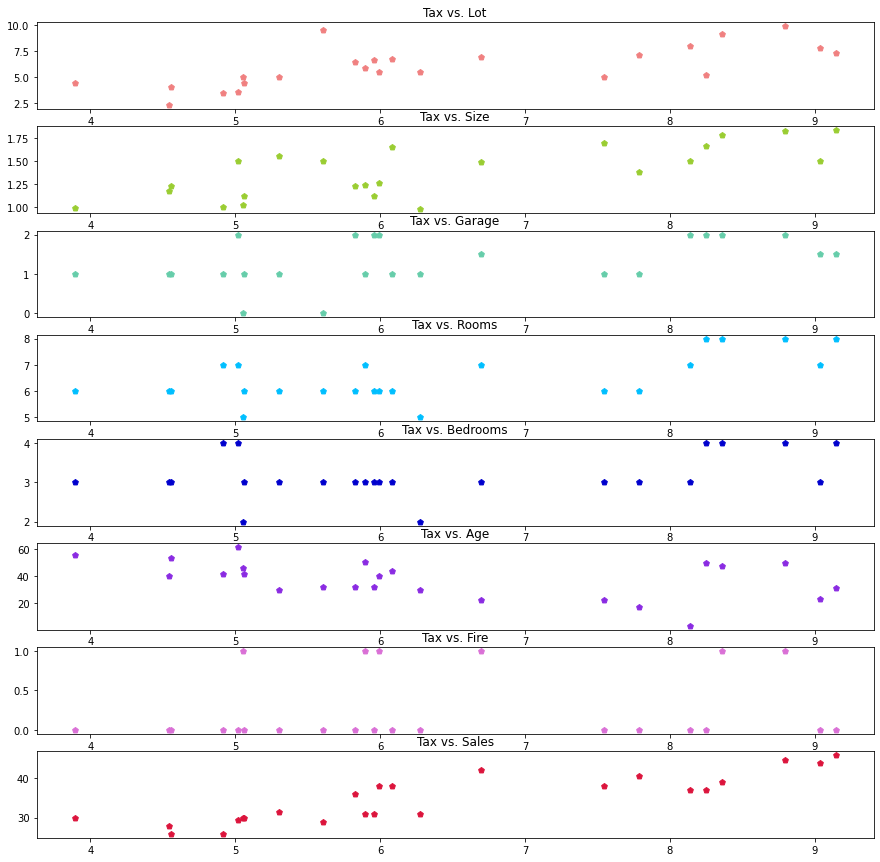

In [155]:
fig, axs = plt.subplots(8, figsize = (15, 15))
axs[0].scatter(df.loc[:, 'tax'], df.loc[:, 'lot'], marker='p', color = 'lightcoral')
axs[0].set_title('Tax vs. Lot', fontsize = 12, loc = "center")

axs[1].scatter(df.loc[:, 'tax'], df.loc[:, 'size'], marker='p', color = 'yellowgreen')
axs[1].set_title('Tax vs. Size', fontsize = 12, loc = "center")

axs[2].scatter(df.loc[:, 'tax'], df.loc[:, 'garage'], marker='p', color = 'mediumaquamarine')
axs[2].set_title('Tax vs. Garage', fontsize = 12, loc = "center")

axs[3].scatter(df.loc[:, 'tax'], df.loc[:, 'rooms'], marker='p', color = 'deepskyblue')
axs[3].set_title('Tax vs. Rooms', fontsize = 12, loc = "center")

axs[4].scatter(df.loc[:, 'tax'], df.loc[:, 'bedrooms'], marker='p', color = 'mediumblue')
axs[4].set_title('Tax vs. Bedrooms', fontsize = 12, loc = "center")

axs[5].scatter(df.loc[:, 'tax'], df.loc[:, 'age'], marker='p', color = 'blueviolet')
axs[5].set_title('Tax vs. Age', fontsize = 12, loc = "center")

axs[6].scatter(df.loc[:, 'tax'], df.loc[:, 'fire'], marker='p', color = 'orchid')
axs[6].set_title('Tax vs. Fire', fontsize = 12, loc = "center")

axs[7].scatter(df.loc[:, 'tax'], df.loc[:, 'sales'], marker='p', color = 'crimson')
axs[7].set_title('Tax vs. Sales', fontsize = 12, loc = "center")

Text(0.5, 1.0, 'Age vs. Sales')

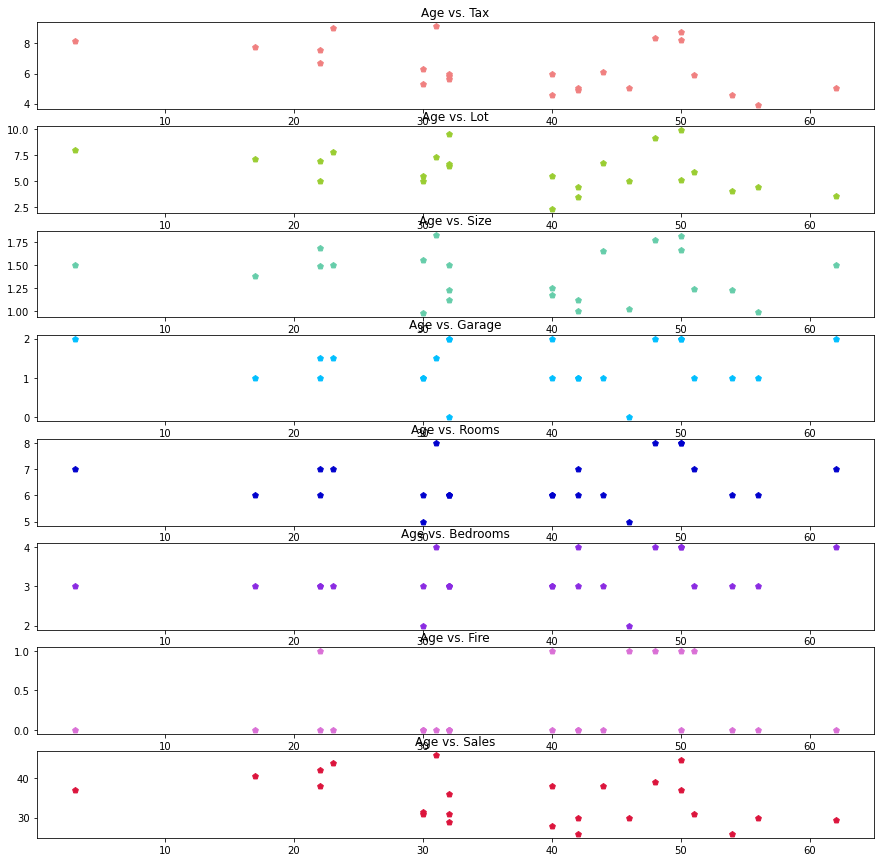

In [156]:
fig, axs = plt.subplots(8, figsize = (15, 15))
axs[0].scatter(df.loc[:, 'age'], df.loc[:, 'tax'], marker='p', color = 'lightcoral')
axs[0].set_title('Age vs. Tax', fontsize = 12, loc = "center")

axs[1].scatter(df.loc[:, 'age'], df.loc[:, 'lot'], marker='p', color = 'yellowgreen')
axs[1].set_title('Age vs. Lot', fontsize = 12, loc = "center")

axs[2].scatter(df.loc[:, 'age'], df.loc[:, 'size'], marker='p', color = 'mediumaquamarine')
axs[2].set_title('Age vs. Size', fontsize = 12, loc = "center")

axs[3].scatter(df.loc[:, 'age'], df.loc[:, 'garage'], marker='p', color = 'deepskyblue')
axs[3].set_title('Age vs. Garage', fontsize = 12, loc = "center")

axs[4].scatter(df.loc[:, 'age'], df.loc[:, 'rooms'], marker='p', color = 'mediumblue')
axs[4].set_title('Age vs. Rooms', fontsize = 12, loc = "center")

axs[5].scatter(df.loc[:, 'age'], df.loc[:, 'bedrooms'], marker='p', color = 'blueviolet')
axs[5].set_title('Age vs. Bedrooms', fontsize = 12, loc = "center")

axs[6].scatter(df.loc[:, 'age'], df.loc[:, 'fire'], marker='p', color = 'orchid')
axs[6].set_title('Age vs. Fire', fontsize = 12, loc = "center")

axs[7].scatter(df.loc[:, 'age'], df.loc[:, 'sales'], marker='p', color = 'crimson')
axs[7].set_title('Age vs. Sales', fontsize = 12, loc = "center")

Text(0.5, 1.0, 'Size of House vs. Tax')

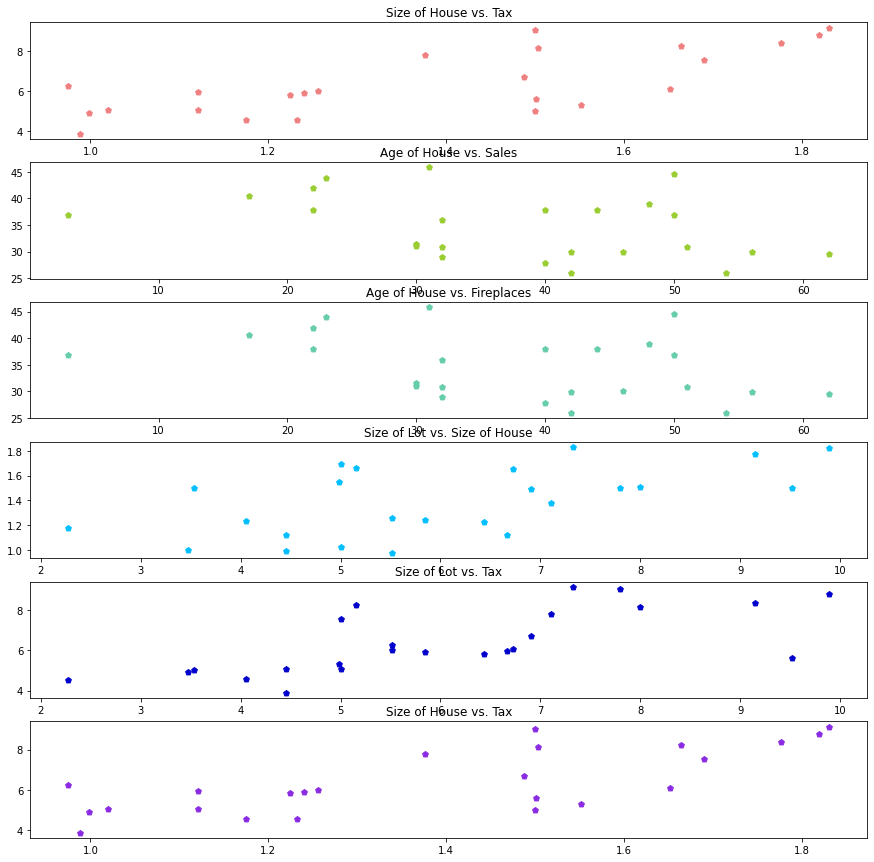

In [175]:
fig, axs = plt.subplots(6, figsize = (15, 15))
axs[0].scatter(df.loc[:, 'size'], df.loc[:, 'tax'], marker='p', color = 'lightcoral')
axs[0].set_title('Size of House vs. Tax', fontsize = 12, loc = "center")

axs[1].scatter(df.loc[:, 'age'], df.loc[:, 'sales'], marker='p', color = 'yellowgreen')
axs[1].set_title('Age of House vs. Sales', fontsize = 12, loc = "center")

axs[2].scatter(df.loc[:, 'age'], df.loc[:, 'sales'], marker='p', color = 'mediumaquamarine')
axs[2].set_title('Age of House vs. Fireplaces', fontsize = 12, loc = "center")

axs[3].scatter(df.loc[:, 'lot'], df.loc[:, 'size'], marker='p', color = 'deepskyblue')
axs[3].set_title('Size of Lot vs. Size of House', fontsize = 12, loc = "center")

axs[4].scatter(df.loc[:, 'lot'], df.loc[:, 'tax'], marker='p', color = 'mediumblue')
axs[4].set_title('Size of Lot vs. Tax', fontsize = 12, loc = "center")

axs[5].scatter(df.loc[:, 'size'], df.loc[:, 'tax'], marker='p', color = 'blueviolet')
axs[5].set_title('Size of House vs. Tax', fontsize = 12, loc = "center")


** Part 1 B: Make a Model**

After removing any reasonably choices for columns from your work in part 1A, fit a model with the remaining columns.  Print its summary table.

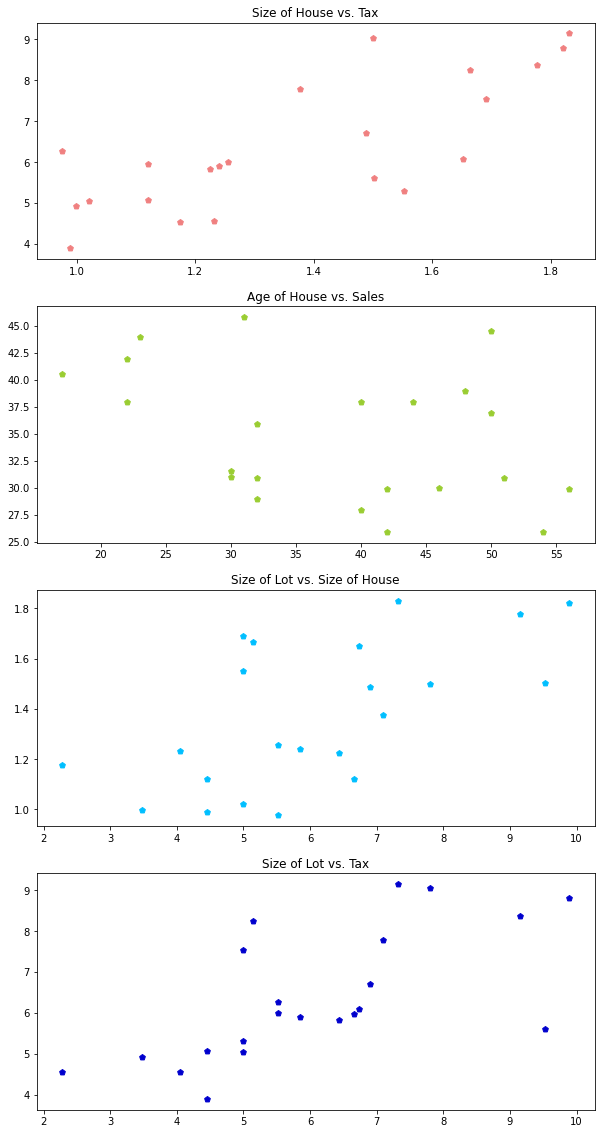

In [186]:
def plotModel(houses): 
    fig, axs = plt.subplots(4, figsize = (10, 20))
    axs[0].scatter(houses.loc[:, 'size'], houses.loc[:, 'tax'], marker='p', color = 'lightcoral')
    axs[0].set_title('Size of House vs. Tax', fontsize = 12, loc = "center")

    axs[1].scatter(houses.loc[:, 'age'], houses.loc[:, 'sales'], marker='p', color = 'yellowgreen')
    axs[1].set_title('Age of House vs. Sales', fontsize = 12, loc = "center")

    axs[2].scatter(houses.loc[:, 'lot'], houses.loc[:, 'size'], marker='p', color = 'deepskyblue')
    axs[2].set_title('Size of Lot vs. Size of House', fontsize = 12, loc = "center")

    axs[3].scatter(houses.loc[:, 'lot'], houses.loc[:, 'tax'], marker='p', color = 'mediumblue')
    axs[3].set_title('Size of Lot vs. Tax', fontsize = 12, loc = "center")
    
def main(): 
    df_new = df[df['age'].between(10, 60)]
    plotModel(df_new)
    
main()

** Part 1 C: Validate your Model**


Perform a thorough discussion of the underlying regression assumptions of your model in part 1B.  You should plot a predictor vs. residuals plot for each column and histogram OR qqplot of the overall residuals.  Make sure to also check for non-linearity.

### Regression Assumptions 
The regression assumptions made for each of the 4 plots above have been defined. 
#### 1. Linear Relationship 
Firstly, the linear relationship between x and y must be linear in order to pass the first regression assumption. The data should easily show a possible line of best fit. 
#### 2. Independence 
Secondly, the residuals for each plot must be independent. The residuals must be random throughout the dataset, and should should show no dependence to the x or y values. 
#### 3. Homoscedasticity 
Thirdly, the residuals must have a constant variance throughout each x value in the dataset. This means the variance of the actual data points from the expected (found through a line of best fit) should be relatively equal to each other throughout the dataset. 
#### 4. Normality 
Lastly, the residuals should be normal throughout the dataset. This means that the residuals should be at a minimum when the x values are at the smallest or largest in the range and a maximum at the median of the dataset.  

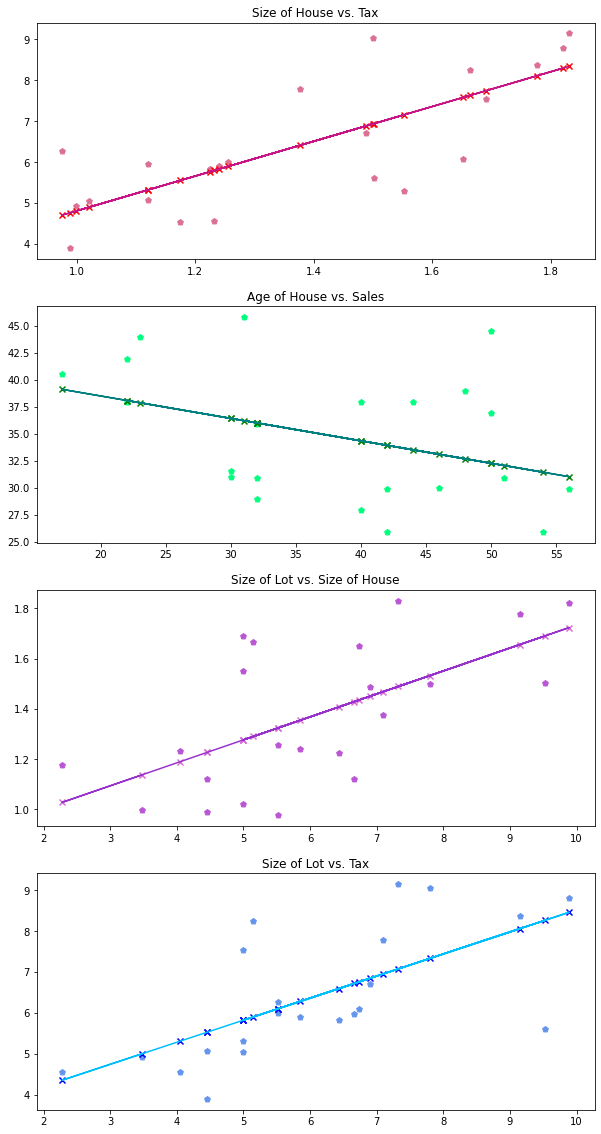

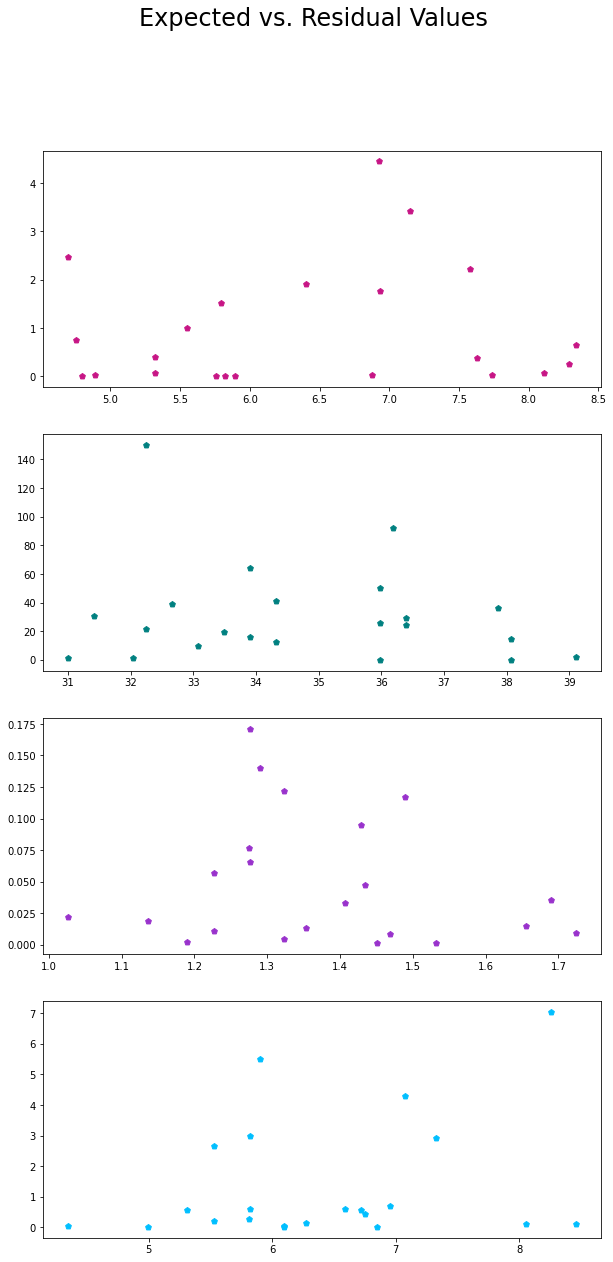

In [240]:
def residualPlots(houses): 
    fig, axs = plt.subplots(4, figsize = (10, 20))
    size = houses.loc[:, 'size']
    tax = houses.loc[:, 'tax']
    age = houses.loc[:, 'age']
    sales = houses.loc[:, 'sales']
    lot = houses.loc[:, 'lot']
    
    #Model 
    #1. Size vs Tax 
    m1, b1 = np.polyfit(size, tax, 1)
    r1 = np.array(np.square((tax - ((m1 * size) + b1))))
    e1 = np.array((m1 * size) + b1)
    
    axs[0].scatter(houses.loc[:, 'size'], houses.loc[:, 'tax'], marker='p', color = 'palevioletred')
    axs[0].plot(size, (m1*size) + b1, color = "mediumvioletred")
    axs[0].scatter(houses.loc[:, 'size'], e1, marker='x', color = 'red')
    axs[0].set_title('Size of House vs. Tax', fontsize = 12, loc = "center")
    
    #2. Age vs Sales 
    m2, b2 = np.polyfit(age, sales, 1)
    r2 = np.array(np.square((sales - ((m2 * age) + b2))))
    e2 = np.array((m2 * age) + b2)
    
    axs[1].scatter(houses.loc[:, 'age'], houses.loc[:, 'sales'], marker='p', color = 'springgreen')
    axs[1].plot(age, (m2*age) + b2, color = "teal")
    axs[1].scatter(houses.loc[:, 'age'], e2, marker='x', color = 'green')
    axs[1].set_title('Age of House vs. Sales', fontsize = 12, loc = "center")
   
    #3. Lot vs Size 
    m3, b3 = np.polyfit(lot, size, 1)
    r3 = np.array(np.square((size - ((m3 * lot) + b3))))
    e3 = np.array((m3 * lot) + b3)

    
    axs[2].scatter(houses.loc[:, 'lot'], houses.loc[:, 'size'], marker='p', color = 'mediumorchid')
    axs[2].plot(lot, (m3*lot) + b3, color = "darkorchid")
    axs[2].scatter(houses.loc[:, 'lot'], e3, marker='x', color = 'orchid')
    axs[2].set_title('Size of Lot vs. Size of House', fontsize = 12, loc = "center")
    
    #4. Lot vs Tax
    m4, b4 = np.polyfit(lot, tax, 1)
    r4 = np.array(np.square((tax - ((m4 * lot) + b4))))
    e4 = np.array((m4 * lot) + b4)

    
    axs[3].scatter(houses.loc[:, 'lot'], houses.loc[:, 'tax'], marker='p', color = 'cornflowerblue')
    axs[3].plot(lot, (m4*lot) + b4, color = "deepskyblue")
    axs[3].scatter(houses.loc[:, 'lot'], e4, marker='x', color = 'blue')
    axs[3].set_title('Size of Lot vs. Tax', fontsize = 12, loc = "center")


    resFig, rsd = plt.subplots(4, figsize = (10,20))
    resFig.suptitle('Expected vs. Residual Values', fontsize = 24)
    rsd[0].scatter(e1, r1, marker = "p", color = 'mediumvioletred')
    rsd[1].scatter(e2, r2, marker = "p", color = 'teal')
    rsd[2].scatter(e3, r3, marker = "p", color = 'darkorchid')
    rsd[3].scatter(e4, r4, marker = "p", color = 'deepskyblue')

def main(): 
    houses = df_new 
    residualPlots(houses)
    
main()

** Part 1 C: Tune your Model**


Based on your work in parts 1B and 1C, **iterate** on your model.  Remove terms or add higher-order polynomials one at a time unless you are satisfied that your model captures the data as well as possible.  Each time you add or subtract a term from your model, you should repeat the steps in parts B and C: a summary table an exploration of assumptions.

In [271]:
def modRsd(houses): 
    fig, axs = plt.subplots(4, figsize = (10, 20))
    size = houses.loc[:, 'size']
    tax = houses.loc[:, 'tax']
    age = houses.loc[:, 'age']
    sales = houses.loc[:, 'sales']
    lot = houses.loc[:, 'lot']
    
    #Model 
    #1. Size vs Tax 
    m1, b1 = np.polyfit(size, tax, 1)
    
    axs[0].scatter(houses.loc[:, 'size'], houses.loc[:, 'tax'], marker='p', color = 'palevioletred')
    axs[0].set_title('Size of House vs. Tax', fontsize = 12, loc = "center")
    
    #2. Age vs Sales 
    m2, b2 = np.polyfit(age, sales, 1)
    
    axs[1].scatter(houses.loc[:, 'age'], houses.loc[:, 'sales'], marker='p', color = 'springgreen')
    axs[1].set_title('Age of House vs. Sales', fontsize = 12, loc = "center")
   
    #3. Lot vs Size 
    m3, b3 = np.polyfit(lot, size, 1)

    axs[2].scatter(houses.loc[:, 'lot'], houses.loc[:, 'size'], marker='p', color = 'mediumorchid')
    axs[2].set_title('Size of Lot vs. Size of House', fontsize = 12, loc = "center")
    
    #4. Lot vs Tax
    m4, b4 = np.polyfit(lot, tax, 1)
    
    axs[3].scatter(houses.loc[:, 'lot'], houses.loc[:, 'tax'], marker='p', color = 'cornflowerblue')
    axs[3].set_title('Size of Lot vs. Tax', fontsize = 12, loc = "center")

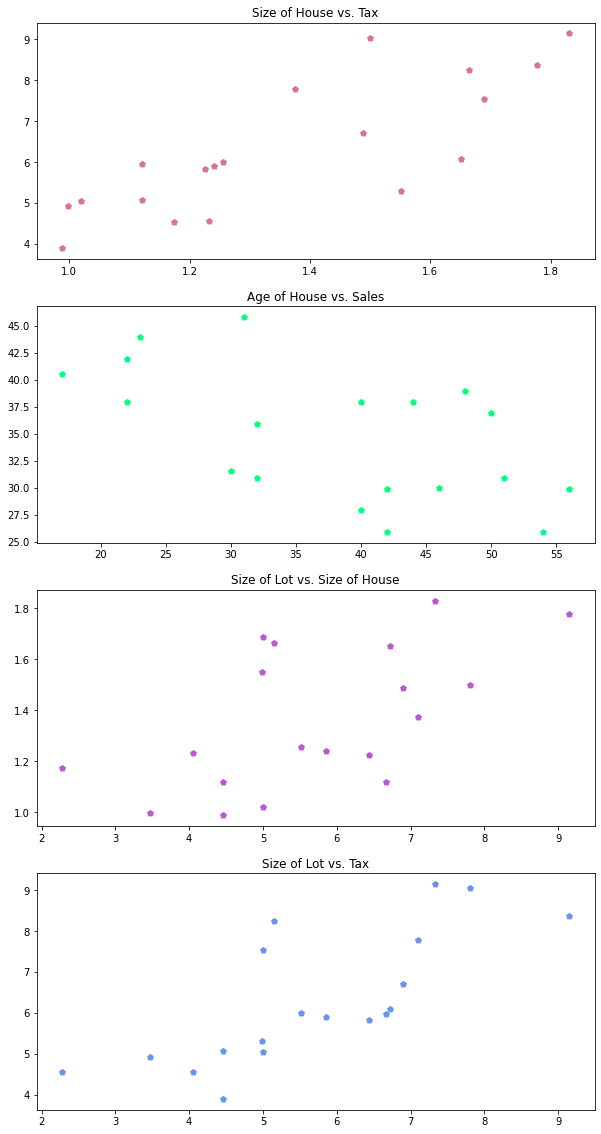

In [294]:
def addone(x): 
    return x + 1
def tuneModel(): 
    houses = df
    houses = houses.drop([1, 7, 10, 19, 22])
    return(houses)

def main(): 
    houses = tuneModel()
    modRsd(houses)
    
main()

** Part 1 E: Explain your Model**

**Justify** your choices: there are a lot of ways to choose a "best" model: we've mentioned e.g. only including significant predictors versus F-tests versus optimizing R-squared.  Explain what terms you chose and why they were appropriate! 

In [295]:
print("Original Houses DataFrame")
print(df)
houses = tuneModel()
print("Modified Houses DataFrame")
print(houses)

Original Houses DataFrame
      tax  bath    lot   size  garage  rooms  bedrooms  age  fire  sales
0   4.918   1.0  3.472  0.998     1.0      7         4   42     0   25.9
1   5.021   1.0  3.531  1.500     2.0      7         4   62     0   29.5
2   4.543   1.0  2.275  1.175     1.0      6         3   40     0   27.9
3   4.557   1.0  4.050  1.232     1.0      6         3   54     0   25.9
4   5.060   1.0  4.455  1.121     1.0      6         3   42     0   29.9
5   3.891   1.0  4.455  0.988     1.0      6         3   56     0   29.9
6   5.898   1.0  5.850  1.240     1.0      7         3   51     1   30.9
7   5.604   1.0  9.520  1.501     0.0      6         3   32     0   28.9
8   5.828   1.0  6.435  1.225     2.0      6         3   32     0   35.9
9   5.300   1.0  4.988  1.552     1.0      6         3   30     0   31.5
10  6.271   1.0  5.520  0.975     1.0      5         2   30     0   31.0
11  5.959   1.0  6.666  1.121     2.0      6         3   32     0   30.9
12  5.050   1.0  5.000  1

For my modfified model, I would have ideally adjusted the values I removed instead of fully removing them. My justification is outlined below: 

#### Row 1
The first row was removed because the house was above 60 years of age. 
#### Row 7 
The seventh row was removed because the size of lot to size of house ratio was considered an outlier. 
#### Row 10 
The tenth row was removed because the size of house to tax ratio was considered an outlier. 
#### Row 19 
The nineteenth row was removed because the age of the house to sales ratio was considered an outlier. 
#### Row 22 
The twenty second row was removed because the house was under 10 years of age. 

### Problem 2 Part 2: Let your Computer do it

There are many methods to automate the analysis we did in part 1 of this problem.  These methods are never going to be as good as using your own eyes, but your computer is pretty powerful! 

Use `itertools.combinations` to perform a linear model (with no higher-order terms) on **every possible subset** of the 9 predictor variables to explain `sales`.  Report the one with the highest adjusted R-squared.

In [296]:
#usage: all the combinations of size 2 of the given list.
#your task: modify it to include the columns of the data frame, and ALL possible sizes
# then fit a model for each and save/find the best adjusted R-squared

list(itertools.combinations(['A','B','C'],2))

[('A', 'B'), ('A', 'C'), ('B', 'C')]

Did the resulting model differ from the one you arrived at in part 1?  Why or why not?  Do you prefer yours to the automated process?  (Ideally you do!)

---
[Back to top](#top)
<a id='bot'></a>